In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [53]:
IMAGE_SIZE=256
BATCH_SIZE=32
EPOCHS=50

In [54]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [55]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [56]:
len(gpus)

0

In [57]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("train 1",shuffle=True,image_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size=BATCH_SIZE)

Found 3208 files belonging to 20 classes.


In [58]:
class_names=dataset.class_names
class_names

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'ALBATROSS',
 'ALBERTS TOWHEE',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN FLAMINGO',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL',
 'AMERICAN PIPIT']

In [59]:
len(dataset)

101

In [60]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy)

(32, 256, 256, 3)
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([14,  1,  8, 15, 16,  0, 12, 12,  0,  1, 13, 15, 18, 10,  8,  7, 19,
        7,  3,  0, 14, 15, 15, 12,  6, 19,  7,  3,  6, 11, 10, 13])>>


In [61]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[106.       108.       105.      ]
  [105.1875   107.1875   104.1875  ]
  [109.125    110.4375   110.875   ]
  ...
  [105.375    129.75     111.0625  ]
  [103.625    126.625    108.25    ]
  [102.       125.       105.      ]]

 [[101.125    103.125    100.125   ]
  [104.93359  106.93359  103.93359 ]
  [107.703125 109.015625 109.453125]
  ...
  [105.375    129.75     111.0625  ]
  [103.47266  126.47266  108.09766 ]
  [101.1875   124.1875   104.1875  ]]

 [[103.4375   105.4375   102.4375  ]
  [109.42969  111.42969  108.42969 ]
  [107.93359  109.24609  109.68359 ]
  ...
  [105.84766  130.65234  111.75    ]
  [103.4375   127.8125   108.75    ]
  [101.       125.375    104.6875  ]]

 ...

 [[120.0625   113.0625   107.0625  ]
  [106.65625   99.65625   93.65625 ]
  [107.34375   99.65625   95.71875 ]
  ...
  [157.98047  190.20312  155.8086  ]
  [169.16797  195.54297  169.54688 ]
  [185.0625   209.       186.8125  ]]

 [[133.125    126.125    120.125   ]
  [116.46875  109.46875  1

<ipython-input-62-6f5c52dfb154>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,4,i+1)


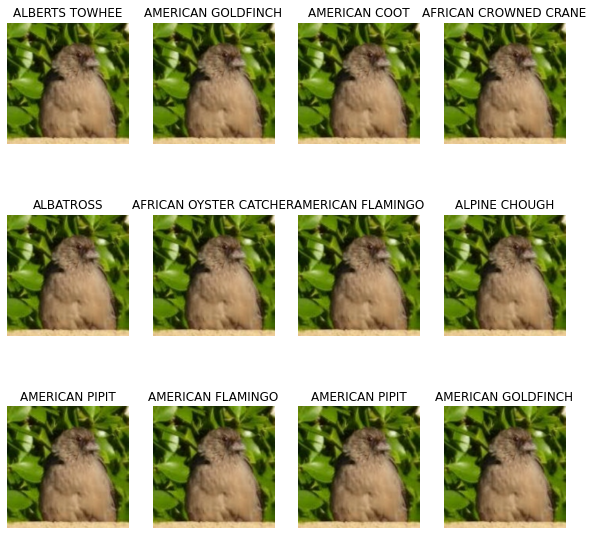

In [62]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(3):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [63]:
train_size=0.8
len(dataset)*train_size

80.80000000000001

In [64]:
train_ds=dataset.take(1766)
train_ds
len(train_ds)

101

In [65]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split *ds_size)
    val_size=int(val_split *ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds
len(train_ds)

101

In [66]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [67]:
len(train_ds)

80

In [68]:
len(val_ds)

10

In [69]:
len(test_ds)

11

In [70]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [71]:
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [72]:
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [79]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 20

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)), 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [80]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (32, 60, 60, 64)          36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (32, 30, 30, 64)         

In [81]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [82]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds)

Epoch 1/50
80/80 [==============================] - 166s 2s/step - loss: 5.8515 - accuracy: 0.0877 - val_loss: 2.5345 - val_accuracy: 0.2000
Epoch 2/50
80/80 [==============================] - 119s 1s/step - loss: 2.4602 - accuracy: 0.2153 - val_loss: 2.0593 - val_accuracy: 0.3313
Epoch 3/50
80/80 [==============================] - 130s 2s/step - loss: 2.1502 - accuracy: 0.3046 - val_loss: 2.0448 - val_accuracy: 0.3844
Epoch 4/50
80/80 [==============================] - 126s 2s/step - loss: 1.7594 - accuracy: 0.4293 - val_loss: 1.5725 - val_accuracy: 0.5250
Epoch 5/50
80/80 [==============================] - 122s 2s/step - loss: 1.5906 - accuracy: 0.4976 - val_loss: 1.3615 - val_accuracy: 0.5312
Epoch 6/50
80/80 [==============================] - 117s 1s/step - loss: 1.4033 - accuracy: 0.5551 - val_loss: 1.2020 - val_accuracy: 0.6219
Epoch 7/50
80/80 [==============================] - 115s 1s/step - loss: 1.2426 - accuracy: 0.6054 - val_loss: 1.2956 - val_accuracy: 0.5969
Epoch 8/50
80

In [83]:
score= model.evaluate(test_ds)

11/11 [==============================] - 41s 562ms/step - loss: 0.8844 - accuracy: 0.8722


In [84]:
score

[0.8843950033187866, 0.8721590638160706]

In [85]:
history

In [86]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 80}

In [87]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [88]:
acc=history.history['accuracy']
val_acc =history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

In [91]:
for image_batch,labels_batch in test_ds.take(1):
    
    print(image_batch[0].numpy())

[[[150.       150.       148.      ]
  [141.875    141.875    139.875   ]
  [132.4375   133.125    129.0625  ]
  ...
  [190.4375   191.75     186.75    ]
  [186.4375   188.4375   183.4375  ]
  [184.       186.       181.      ]]

 [[145.9375   145.125    143.125   ]
  [136.49219  137.       133.01953 ]
  [125.63281  126.57422  121.75    ]
  ...
  [186.6289   188.5      183.5     ]
  [183.1875   185.1875   180.1875  ]
  [180.75     182.75     177.75    ]]

 [[140.1875   137.125    134.4375  ]
  [128.76172  127.88281  123.31641 ]
  [115.76953  115.39453  110.39453 ]
  ...
  [182.78516  185.25781  179.3125  ]
  [178.48438  180.8711   175.74219 ]
  [173.8125   177.875    172.1875  ]]

 ...

 [[ 58.5       35.5       18.875   ]
  [ 59.921875  38.546875  21.109375]
  [ 56.640625  37.015625  19.820312]
  ...
  [165.92578  161.14062  158.57031 ]
  [179.30469  174.99219  173.36719 ]
  [179.       174.6875   173.0625  ]]

 [[ 65.125     42.125     24.125   ]
  [ 63.703125  42.328125  23.515625]


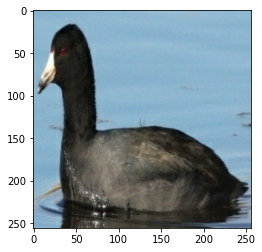

In [92]:
for image_batch,labels_batch in test_ds.take(1):
    
    plt.imshow(image_batch[0].numpy().astype('uint8'))

first image to predict
actual label: AMERICAN GOLDFINCH
[0.00000000e+00 1.37213803e-26 5.52164549e-14 1.03033406e-25
 1.17906226e-21 5.86790349e-29 1.88671177e-35 1.66332157e-21
 6.03530392e-38 2.23118761e-19 1.56468451e-32 3.68637195e-28
 7.03866901e-24 4.04074240e-20 6.91552230e-24 1.28897949e-34
 9.07616153e-28 1.00000000e+00 1.06095696e-27 4.10129979e-31]
predicted label: AMERICAN GOLDFINCH


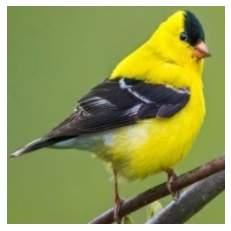

In [93]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print(batch_prediction[0])
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    plt.axis("off")

In [94]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

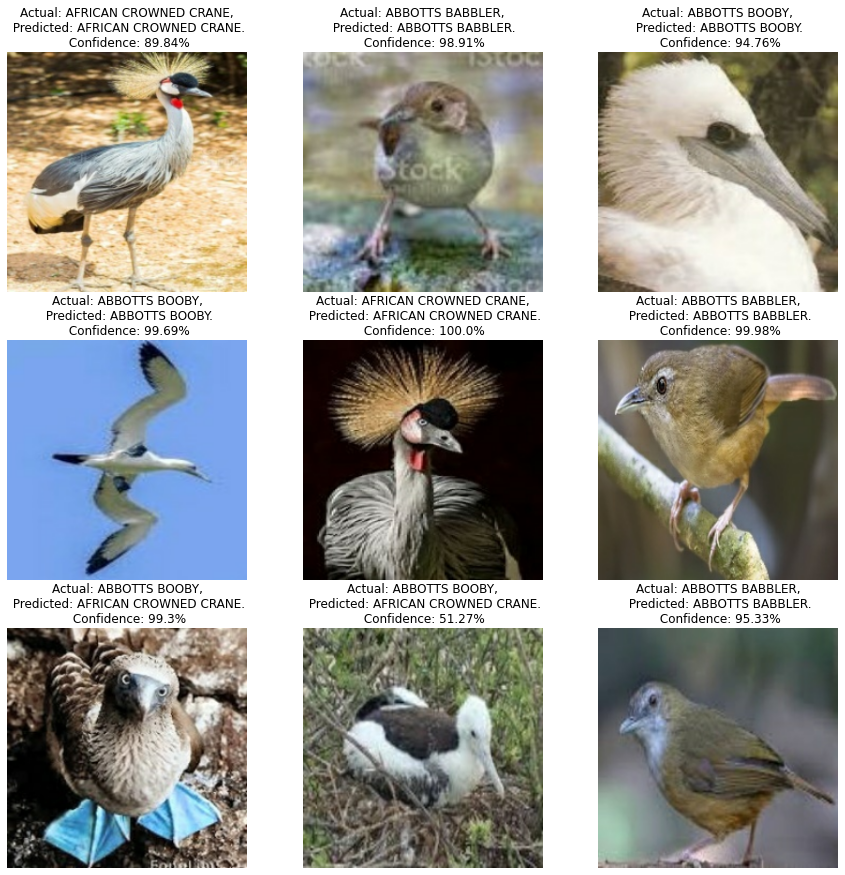

In [41]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [2]:
import os
model_version=max([int(i) for i in os.listdir("./model1") + [0]])+1
model.save(f"./model1/{model_version}")

NameError: name 'model' is not defined